# Домашнее задание: модели классификации и оценка их качества.

Будем тренироваться обучать модели классификации и интерпретировать их качество.

Бернухова Анастасия

## Часть 1. Обучение моделей классификации (5 баллов). 

Поработайте с датасетом telecom_churn. Вам предстоит по характеристикам клиента предсказать, уйдет он или нет (целевая колонка - Churn).

A. Решите задачу с помощью логистической регрессии:
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

B. Решите задачу с помощью метода опорных векторов (с kernel = 'linear'):
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

Не забудьте масштабировать данные перед применением линейных моделей.

C. Попробуйте увеличить число признаков с помощью добавления полиномиальных признаков. Также можно добавить функции от признаков вручную (те, которые вам кажутся подходящими в данной задаче).
Улучшилось ли качество алгоритма?

D. Постройте матрицу корреляций признаков. Есть ли признаки, которые практически не коррелируют с целевой переменной? Попробуйте их удалить. Есть ли пары сильно коррелирующих между собой признаков? Удалите по одному признаку из каждой пары.
Помогло ли это улучшить качество в данной задаче?

Пункты C и D можно скомбинировать для достижения наилучшего качества.

E. Сделайте мини-отчет о проведенной работе. Для этого ответьте на вопросы:
a) какой классификатор дал наилучший результат? чему равны значения метрик accuracy, f1-score и ROC-AUC? 
(Вы можете изначально разбить данные на train и test и сравнивать значения метрик на этих выборках; или же можно оценивать качество алгоритмов по кросс-валидации).

b) какие новые признаки вы добавили и какие признаки удалили?

c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('telecom_churn.csv')
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


### Поработаем с датасетом

In [3]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [4]:
X = df.iloc[:,:-1]
y = df['Churn']

In [5]:
num_cols = X.columns[X.dtypes == 'int64'].tolist()
num_cols.extend(X.columns[X.dtypes == 'float64'].tolist())
cat_cols = X.columns[X.dtypes == 'object'].tolist()

print(f"Numeric columns: {', '.join(num_cols)}")
print()
print(f"Categorical columns: {', '.join(cat_cols)}")

Numeric columns: Account length, Area code, Number vmail messages, Total day calls, Total eve calls, Total night calls, Total intl calls, Customer service calls, Total day minutes, Total day charge, Total eve minutes, Total eve charge, Total night minutes, Total night charge, Total intl minutes, Total intl charge

Categorical columns: State, International plan, Voice mail plan


In [6]:
for col in num_cols:
    print(col)
    print(X[col].unique())
    print()

Account length
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200   5   9 178 181 182 217 177 210  29 180   2  17   7 212 232 192 195
 197 225 184 191 201  15 183 202   8 175   4 188 204 221]

Area code
[415 408 510]

Number vmail messages
[25 26  0 24 37 27 33 39 30 41 28 34 46 29 35 21 32 42 36 22 23 43 31 38
 40

  2.6  3.4  1.1 18.3 16.6  2.1  2.4  2.5]

Total intl charge
[2.7  3.7  3.29 1.78 2.73 1.7  2.03 1.92 2.35 3.02 3.43 2.46 3.32 3.54
 1.46 3.73 2.19 3.51 2.86 1.54 2.57 2.08 2.78 4.19 3.97 3.   3.83 3.4
 3.19 2.24 3.92 2.84 2.54 3.94 2.48 0.95 2.3  3.56 2.   2.38 2.97 2.11
 1.84 3.08 2.51 2.62 2.75 2.16 1.57 3.27 3.24 3.13 2.21 1.67 1.97 1.65
 3.16 4.05 2.65 3.35 2.32 2.94 3.75 2.4  2.13 1.43 1.19 3.38 3.05 2.43
 2.59 3.59 5.4  1.94 1.73 3.81 3.86 1.86 3.11 4.27 3.46 4.37 0.   3.21
 2.67 2.27 2.92 3.62 2.89 4.75 1.27 0.73 3.65 3.48 3.89 2.81 1.81 4.16
 1.22 1.76 4.21 1.59 5.1  2.05 1.35 1.89 3.78 4.86 4.32 4.   1.   0.54
 1.3  4.13 1.62 3.67 4.64 4.73 1.51 4.91 0.97 4.46 1.24 1.38 1.11 4.4
 4.02 4.43 4.51 0.35 4.1  4.08 4.29 1.49 4.35 1.08 4.56 1.4  1.13 4.24
 4.59 1.05 1.03 0.59 4.62 1.32 4.83 4.67 4.97 4.81 1.16 0.78 0.84 0.89
 0.7  0.92 0.3  4.94 4.48 0.57 0.65 0.68]



Area code - код города, содержит три значения (415 408 510), их нельзя сравнить как числа, тоже категориальный

In [7]:
cat_cols.append('Area code')
num_cols.remove('Area code')

In [8]:
#смотрим на долю объектов каждой категории для категориальных признаков
for col in cat_cols:
    print(col)
    display(X[col].value_counts(normalize=True))
    print()

State


WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
OH    0.023402
WI    0.023402
OR    0.023402
VA    0.023102
WY    0.023102
CT    0.022202
MI    0.021902
VT    0.021902
ID    0.021902
UT    0.021602
TX    0.021602
IN    0.021302
MD    0.021002
KS    0.021002
NC    0.020402
NJ    0.020402
MT    0.020402
CO    0.019802
NV    0.019802
WA    0.019802
RI    0.019502
MA    0.019502
MS    0.019502
AZ    0.019202
FL    0.018902
MO    0.018902
NM    0.018602
ND    0.018602
ME    0.018602
OK    0.018302
DE    0.018302
NE    0.018302
SD    0.018002
SC    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
GA    0.016202
DC    0.016202
HI    0.015902
TN    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: State, dtype: float64


International plan


No     0.90309
Yes    0.09691
Name: International plan, dtype: float64


Voice mail plan


No     0.723372
Yes    0.276628
Name: Voice mail plan, dtype: float64


Area code


415    0.496550
510    0.252025
408    0.251425
Name: Area code, dtype: float64

Бинарные колонки (onehot кодирование): International plan, Voice mail plan

State, Area code - небинарные неупорядоченные

In [9]:
binary_cols = ['International plan', 'Voice mail plan']
cat_cols = ['State', 'Area code']

In [10]:
X.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


разные масштабы у признаков (где-то 100-200 среднее, где-то 1-2)
это будет плохо влиять на интерпретируемость модели
регуляризация: для нее лучше чтоб был одинаковый масштаб

In [11]:
y.value_counts(normalize=True)
# классы несбалансированны? :/ ну ладно

False    0.855086
True     0.144914
Name: Churn, dtype: float64

In [12]:
# перевод в 0/1 из bool
y = y.astype(int)
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Кодирование категориальных признаков

In [122]:
from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder

In [123]:
#кодируем бинарные International plan, Voice mail plan через onehot
one_hot_enc = OneHotEncoder(cols=['International plan', 'Voice mail plan'])
one_hot_enc.fit(X_train, drop='first')
X_train = one_hot_enc.transform(X_train)
X_test = one_hot_enc.transform(X_test)

X_train.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,State,Account length,Area code,International plan_1,International plan_2,Voice mail plan_1,Voice mail plan_2,Number vmail messages,Total day minutes,Total day calls,...,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
2016,RI,80,510,1,0,1,0,0,202.4,118,...,260.2,67,22.12,177.4,112,7.98,9.2,5,2.48,3
1362,WV,63,510,1,0,1,0,0,132.9,122,...,67.0,62,5.70,160.4,121,7.22,9.9,2,2.67,3
2670,WY,116,510,1,0,0,1,12,221.0,108,...,151.0,118,12.84,179.0,80,8.06,9.0,6,2.43,2
2210,UT,71,415,1,0,1,0,0,278.9,110,...,190.2,67,16.17,255.2,84,11.48,11.7,7,3.16,0
1846,NH,120,510,1,0,0,1,43,177.9,117,...,175.1,70,14.88,161.3,117,7.26,11.5,4,3.11,1


In [124]:
#удаляем одну из колонок, чтоб не было лин зависимости (-> переобучения)

X_train.drop(['International plan_2', 'Voice mail plan_2'], axis=1, inplace=True)
X_test.drop(['International plan_2', 'Voice mail plan_2'], axis=1, inplace=True)

X_train.rename(columns={'International plan_1': 'International plan',
                        'Voice mail plan_1': 'Voice mail plan'}, inplace=True)
X_test.rename(columns={'International plan_1': 'International plan', 
                       'Voice mail plan_1': 'Voice mail plan'}, inplace=True)

X_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
2016,RI,80,510,1,1,0,202.4,118,34.41,260.2,67,22.12,177.4,112,7.98,9.2,5,2.48,3
1362,WV,63,510,1,1,0,132.9,122,22.59,67.0,62,5.70,160.4,121,7.22,9.9,2,2.67,3
2670,WY,116,510,1,0,12,221.0,108,37.57,151.0,118,12.84,179.0,80,8.06,9.0,6,2.43,2
2210,UT,71,415,1,1,0,278.9,110,47.41,190.2,67,16.17,255.2,84,11.48,11.7,7,3.16,0
1846,NH,120,510,1,0,43,177.9,117,30.24,175.1,70,14.88,161.3,117,7.26,11.5,4,3.11,1


In [125]:
#закодируем 'State', 'Area code' через leave_one_out

from category_encoders.leave_one_out import LeaveOneOutEncoder

loo_enc = LeaveOneOutEncoder(cols=['State', 'Area code'], sigma=2.)
loo_enc.fit(X_train, y_train)

X_train = loo_enc.transform(X_train, y_train)
X_test = loo_enc.transform(X_test, y_test)

X_train.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
2016,0.165163,80,0.383751,1,1,0,202.4,118,34.41,260.2,67,22.12,177.4,112,7.98,9.2,5,2.48,3
1362,0.332974,63,-0.308818,1,1,0,132.9,122,22.59,67.0,62,5.70,160.4,121,7.22,9.9,2,2.67,3
2670,0.621365,116,0.446955,1,0,12,221.0,108,37.57,151.0,118,12.84,179.0,80,8.06,9.0,6,2.43,2
2210,0.169928,71,0.651221,1,1,0,278.9,110,47.41,190.2,67,16.17,255.2,84,11.48,11.7,7,3.16,0
1846,-0.215213,120,0.303929,1,0,43,177.9,117,30.24,175.1,70,14.88,161.3,117,7.26,11.5,4,3.11,1


#### Масштабирование числовых признаков

In [127]:
# с семинара 4 (чтобы масштабировать только num_cols и оставался формат дф)
from sklearn.preprocessing import StandardScaler
from sklearn.base import TransformerMixin

class CustomScaler(TransformerMixin):
    def __init__(self, cols, scaler=None):
        self.cols = cols
        self.scaler = scaler or StandardScaler()
        
    def fit(self, X, y=None):
        num_cols = X.copy()[self.cols]
        self.scaler.fit(num_cols)
        return self
    def transform(self, X, y=None):
        X_res = X.copy()
        num_cols_tr = self.scaler.transform(X_res[self.cols])
        for i, col in enumerate(self.cols):
            X_res[col] = num_cols_tr[:,i]
        return X_res

In [128]:
sc = CustomScaler(num_cols)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [129]:
X_train

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
2016,0.165163,-0.511937,0.383751,1,1,-0.585483,0.410716,0.873749,0.410877,1.167102,-1.646317,1.167733,-0.456961,0.615443,-0.458282,-0.373682,0.226639,-0.379643,1.073319
1362,0.332974,-0.939002,-0.308818,1,1,-0.585483,-0.864713,1.074874,-0.865095,-2.639021,-1.895351,-2.637901,-0.790790,1.075039,-0.789925,-0.122835,-0.997316,-0.127479,1.073319
2670,0.621365,0.392435,0.446955,1,0,0.289180,0.752053,0.370935,0.752000,-0.984185,0.893834,-0.983076,-0.425542,-1.018675,-0.423373,-0.445353,0.634624,-0.446002,0.323378
2210,0.169928,-0.738030,0.651221,1,1,-0.585483,1.814605,0.471498,1.814230,-0.211928,-1.646317,-0.211288,1.070799,-0.814411,1.069020,0.522200,1.042609,0.522840,-1.176504
1846,-0.215213,0.492921,0.303929,1,0,2.548723,-0.038896,0.823467,-0.039276,-0.509404,-1.496896,-0.510269,-0.773117,0.870774,-0.772470,0.450529,-0.181346,0.456481,-0.426563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.085208,0.141221,0.163971,1,1,-0.585483,1.732023,0.974311,1.732188,-0.046444,-0.899214,-0.046732,-0.782936,-1.937867,-0.781198,-1.520411,-0.589331,-1.521019,-0.426563
1130,-0.468481,0.543164,-0.277181,1,1,-0.585483,-2.659490,-1.942006,-2.659228,-0.397112,-0.550566,-0.396702,1.000106,-2.142132,0.999200,0.880552,-0.997316,0.881179,-0.426563
1294,0.312121,-0.863638,0.131092,1,1,-0.585483,-1.696036,-1.238068,-1.696312,1.202563,0.545186,1.202498,-0.315574,1.279303,-0.314280,-0.373682,0.226639,-0.379643,-0.426563
860,0.406529,1.723873,0.641232,1,1,-0.585483,-0.015039,0.521779,-0.015527,-0.507434,1.491516,-0.507951,0.548455,-0.405881,0.549737,-0.122835,0.634624,-0.127479,0.323378


## А. Решение с помощью логистической регрессии

In [69]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear', random_state=42)

In [23]:
y.value_counts(normalize=True)
# классы несбалансированны, объектов второго класса гораздо меньше, чем первого, 
# поэтому использовать accuracy как метрику качества неправильно

0    0.855086
1    0.144914
Name: Churn, dtype: float64

#### Подбор параметров с помощью GridSearchCV

In [24]:
from sklearn.model_selection import GridSearchCV

params = {'C': np.arange(1e-100,10,0.01)}

grid_lr = GridSearchCV(log_reg, params, scoring='f1', cv=5)

grid_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid={'C': array([1.00e-100, 1.00e-002, 2.00e-002, 3.00e-002, 4.00e-002, 5.00e-002,
       6.00e-002, 7.00e-002, 8.00e-002, 9.00e-002, 1.00e-001, 1.10e-001,
       1.20e-001, 1.30e-001, 1.40e-001, 1.50e-001, 1.60e-001, 1.70e-001,
       1.80e-001, 1.90e-001, 2.00e-001, 2.10e-001, 2.20e-001, 2.30e-001,
       2.40...
       9.66e+000, 9.67e+000, 9.68e+000, 9.69e+000, 9.70e+000, 9.71e+000,
       9.72e+000, 9.73e+000, 9.74e+000, 9.75e+000, 9.76e+000, 9.77e+000,
       9.78e+000, 9.79e+000, 9.80e+000, 9.81e+000, 9.82e+000, 9.83e+000,
       9.84e+000, 9.85e+000, 9.86e+000, 9.87e+000, 9.88e+000, 9.89e+000,
       9.90e+000, 9.91e+000, 9.92e+000, 9.93e+000, 9.94e+000, 9.95e+000,
       9.96e+000, 9.97e+000, 9.98e+000, 9.99e+000])},
             scoring='f1')

In [25]:
print('best score:', grid_lr.best_score_)
print('best params:', grid_lr.best_params_)

best score: 0.28261433372069417
best params: {'C': 0.89}


In [118]:
from sklearn.model_selection import cross_validate

log_reg = LogisticRegression(solver='liblinear', random_state=42, C=0.89)

scores = ['accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1', 'roc_auc']

for score in scores:
    cv_train_lr = cross_validate(log_reg, X_train, y_train, scoring=score, cv=5)
    print(f"Среднее {score} на train = {cv_train_lr['test_score'].mean()}")


Среднее accuracy на train = 0.8581163669114336
Среднее balanced_accuracy на train = 0.5851966599916878
Среднее precision на train = 0.5282828282828284
Среднее recall на train = 0.2
Среднее f1 на train = 0.2898347317569286
Среднее roc_auc на train = 0.8004107964264785


In [119]:
for score in scores:
    cv_test_lr = cross_validate(log_reg, X_test, y_test, scoring=score, cv=5)
    print(f"Среднее {score} на test = {cv_test_lr['test_score'].mean()}")


Среднее accuracy на test = 0.861
Среднее balanced_accuracy на test = 0.5836624105036716
Среднее precision на test = 0.5305555555555557
Среднее recall на test = 0.19532019704433495
Среднее f1 на test = 0.28267166688219325
Среднее roc_auc на test = 0.8091890126947948


- Средние значения метрик на train и test не сильно отличаются, поэтому модель работает как надо (не переобучается).

- Само качество модели не очень хорошее: по accuracy о нем не стоит судить (классы несбалансированные), balanced_accuracy = 0.58 - далеко от единицы, f1-мера совсем далека от 1 (0.28), roc_auc кажется близким к 1, однако при значении 0.5 это случайная классификация, у нас 0.8, то есть где-то по середине между случайной и идеальной.

## B. Решение с помощью метода опорных векторов

In [28]:
from sklearn.svm import SVC

svm = SVC(kernel='linear') 

params = {'C': np.arange(1e-100,5,0.01)}
grid_svm = GridSearchCV(svm, params, scoring='roc_auc', cv=5) #по roc_auc, т.к. f1 нулевые

grid_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.00e-100, 1.00e-002, 2.00e-002, 3.00e-002, 4.00e-002, 5.00e-002,
       6.00e-002, 7.00e-002, 8.00e-002, 9.00e-002, 1.00e-001, 1.10e-001,
       1.20e-001, 1.30e-001, 1.40e-001, 1.50e-001, 1.60e-001, 1.70e-001,
       1.80e-001, 1.90e-001, 2.00e-001, 2.10e-001, 2.20e-001, 2.30e-001,
       2.40e-001, 2.50e-001, 2.60e-001, 2.70e-00...
       4.62e+000, 4.63e+000, 4.64e+000, 4.65e+000, 4.66e+000, 4.67e+000,
       4.68e+000, 4.69e+000, 4.70e+000, 4.71e+000, 4.72e+000, 4.73e+000,
       4.74e+000, 4.75e+000, 4.76e+000, 4.77e+000, 4.78e+000, 4.79e+000,
       4.80e+000, 4.81e+000, 4.82e+000, 4.83e+000, 4.84e+000, 4.85e+000,
       4.86e+000, 4.87e+000, 4.88e+000, 4.89e+000, 4.90e+000, 4.91e+000,
       4.92e+000, 4.93e+000, 4.94e+000, 4.95e+000, 4.96e+000, 4.97e+000,
       4.98e+000, 4.99e+000])},
             scoring='roc_auc')

In [29]:
print('best score:', grid_svm.best_score_)
print('best params:', grid_svm.best_params_)

best score: 0.7877374303331488
best params: {'C': 0.01}


In [30]:
from sklearn.model_selection import cross_validate

svm = SVC(kernel='linear', C=0.01) 

for score in scores:
    cv_train_svm = cross_validate(svm, X_train, y_train, scoring=score, cv=5)
    print(f"Среднее {score} на train = {cv_train_svm['test_score'].mean()}")


Среднее accuracy на train = 0.8542647342639992
Среднее balanced_accuracy на train = 0.5


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Fram

Среднее precision на train = 0.0
Среднее recall на train = 0.0
Среднее f1 на train = 0.0
Среднее roc_auc на train = 0.7877374303331488


In [31]:
for score in scores:
    cv_test_svm = cross_validate(svm, X_test, y_test, scoring=score, cv=5)
    print(f"Среднее {score} на test = {cv_test_svm['test_score'].mean()}")


Среднее accuracy на test = 0.857
Среднее balanced_accuracy на test = 0.5


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Fram

Среднее precision на test = 0.0
Среднее recall на test = 0.0
Среднее f1 на test = 0.0
Среднее roc_auc на test = 0.7625464774606927


- prec = recall = f1 = 0, модель не предсказывает положительный класс? balanced_accuracy = 0.5, так как предсказывается всегда только отрицательный класс


- accuracy, f1, roc_auc несильно отличаются на train и test, переобучения нет


Про качество модели можно судить здесь можно, видимо, только по roc_auc

- roc_auc при случайной классификации = 0.5, при идеальной = 1, у нас что-то по середине, значит, качество не очень хорошее

- На тесте roc_auc не сильно меньше, чем на трейне, значит, переобучения нет.

## C. Добавление полиномиальных признаков

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe_lr = Pipeline([('poly', PolynomialFeatures(degree=2)), 
                     ('lr', (LogisticRegression(solver='liblinear', random_state=42, C=1.37, penalty='l1')))])
pipe_lr.fit(X_train, y_train)


pipe_svm = Pipeline([('poly', PolynomialFeatures(degree=2)), ('svc', SVC(kernel='linear', C=0.09))])
pipe_svm.fit(X_train, y_train)

print('lr:')
for score in scores:
    cv_train_pipe_lr = cross_validate(pipe_lr, X_train, y_train, scoring=score, cv=5)
    print(f"Среднее {score} на train = {cv_train_pipe_lr['test_score'].mean()}")

print('svm:')
for score in scores:
    cv_train_pipe_svm = cross_validate(pipe_lr, X_train, y_train, scoring=score, cv=5)
    print(f"Среднее {score} на train = {cv_train_pipe_svm['test_score'].mean()}")

lr:
Среднее accuracy на train = 0.9039793770850373
Среднее balanced_accuracy на train = 0.7510874437053319
Среднее precision на train = 0.7348375417963796
Среднее recall на train = 0.5352941176470589
Среднее f1 на train = 0.6175504910782434
Среднее roc_auc на train = 0.8635608938100499
svm:
Среднее accuracy на train = 0.9039793770850373
Среднее balanced_accuracy на train = 0.7510874437053319
Среднее precision на train = 0.7348375417963796
Среднее recall на train = 0.5352941176470589
Среднее f1 на train = 0.6175504910782434
Среднее roc_auc на train = 0.8635608938100499


In [131]:
print('lr:')
for score in scores:
    cv_test_pipe_lr = cross_validate(pipe_lr, X_test, y_test, scoring=score, cv=5)
    print(f"Среднее {score} на test = {cv_test_pipe_lr['test_score'].mean()}")
    
print('svm')
for score in scores:
    cv_test_pipe_svm = cross_validate(pipe_lr, X_test, y_test, scoring=score, cv=5)
    print(f"Среднее {score} на test = {cv_test_pipe_svm['test_score'].mean()}")

lr:
Среднее accuracy на test = 0.9029999999999999
Среднее balanced_accuracy на test = 0.7716711419018008
Среднее precision на test = 0.697550123408247
Среднее recall на test = 0.5876847290640395
Среднее f1 на test = 0.632086724295453
Среднее roc_auc на test = 0.8879876197443621
svm
Среднее accuracy на test = 0.9029999999999999
Среднее balanced_accuracy на test = 0.7716711419018008
Среднее precision на test = 0.697550123408247
Среднее recall на test = 0.5876847290640395
Среднее f1 на test = 0.632086724295453
Среднее roc_auc на test = 0.8879876197443621


Все метрики качества выросли по сравнению с прошлыми значениями, добавим полиномиал признаки в датафрейм

In [132]:
# то же самое, но чтобы полиномиальные признаки сохранились в датафрейме

import copy

cols = copy.deepcopy(X_train.columns)
print(cols)

for col1 in cols:
    for col2 in cols:
        col_name = col1 + '_x_' + col2
        if col_name not in X_train.columns:
            X_train[col_name] = X_train[col1]*X_train[col2]
            X_test[col_name] = X_test[col1]*X_test[col2]

X_train


Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls'],
      dtype='object')


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Customer service calls_x_Total eve minutes,Customer service calls_x_Total eve calls,Customer service calls_x_Total eve charge,Customer service calls_x_Total night minutes,Customer service calls_x_Total night calls,Customer service calls_x_Total night charge,Customer service calls_x_Total intl minutes,Customer service calls_x_Total intl calls,Customer service calls_x_Total intl charge,Customer service calls_x_Customer service calls
2016,0.165163,-0.511937,0.383751,1,1,-0.585483,0.410716,0.873749,0.410877,1.167102,...,1.252673,-1.767023,1.253350,-0.490465,0.660566,-0.491883,-0.401080,0.243256,-0.407478,1.152013
1362,0.332974,-0.939002,-0.308818,1,1,-0.585483,-0.864713,1.074874,-0.865095,-2.639021,...,-2.832511,-2.034316,-2.831308,-0.848770,1.153859,-0.847842,-0.131841,-1.070439,-0.136825,1.152013
2670,0.621365,0.392435,0.446955,1,0,0.289180,0.752053,0.370935,0.752000,-0.984185,...,-0.318264,0.289046,-0.317905,-0.137611,-0.329417,-0.136909,-0.144017,0.205223,-0.144227,0.104573
2210,0.169928,-0.738030,0.651221,1,1,-0.585483,1.814605,0.471498,1.814230,-0.211928,...,0.249334,1.936898,0.248581,-1.259800,0.958157,-1.257706,-0.614370,-1.226634,-0.615123,1.384162
1846,-0.215213,0.492921,0.303929,1,0,2.548723,-0.038896,0.823467,-0.039276,-0.509404,...,0.217293,0.638521,0.217662,0.329783,-0.371440,0.329507,-0.192179,0.077356,-0.194718,0.181956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.085208,0.141221,0.163971,1,1,-0.585483,1.732023,0.974311,1.732188,-0.046444,...,0.019811,0.383571,0.019934,0.333971,0.826623,0.333230,0.648551,0.251387,0.648810,0.181956
1130,-0.468481,0.543164,-0.277181,1,1,-0.585483,-2.659490,-1.942006,-2.659228,-0.397112,...,0.169393,0.234851,0.169218,-0.426608,0.913754,-0.426222,-0.375611,0.425418,-0.375878,0.181956
1294,0.312121,-0.863638,0.131092,1,1,-0.585483,-1.696036,-1.238068,-1.696312,1.202563,...,-0.512969,-0.232556,-0.512941,0.134612,-0.545704,0.134060,0.159399,-0.096676,0.161942,0.181956
860,0.406529,1.723873,0.641232,1,1,-0.585483,-0.015039,0.521779,-0.015527,-0.507434,...,-0.164093,0.482323,-0.164260,0.177358,-0.131253,0.177773,-0.039722,0.205223,-0.041224,0.104573


In [133]:
print('lr:')
for score in scores:
    cv_train_pipe_lr = cross_validate(log_reg, X_train, y_train, scoring=score, cv=5)
    print(f"Среднее {score} на train = {cv_train_pipe_lr['test_score'].mean()}")

print('svm:')
for score in scores:
    cv_train_pipe_svm = cross_validate(svm, X_train, y_train, scoring=score, cv=5)
    print(f"Среднее {score} на train = {cv_train_pipe_svm['test_score'].mean()}")
    

lr:
Среднее accuracy на train = 0.9039784580603063
Среднее balanced_accuracy на train = 0.753525477898115
Среднее precision на train = 0.7322508903629306
Среднее recall на train = 0.5411764705882354
Среднее f1 на train = 0.6209346056803684
Среднее roc_auc на train = 0.8601092407341143
svm:
Среднее accuracy на train = 0.8988355956658793
Среднее balanced_accuracy на train = 0.7017295677858554
Среднее precision на train = 0.7904776987718164
Среднее recall на train = 0.4235294117647059
Среднее f1 на train = 0.5449604095514873
Среднее roc_auc на train = 0.854503888304859


In [134]:
print('lr:')
for score in scores:
    cv_test_pipe_lr = cross_validate(log_reg, X_test, y_test, scoring=score, cv=5)
    print(f"Среднее {score} на test = {cv_test_pipe_lr['test_score'].mean()}")
    
print('svm')
for score in scores:
    cv_test_pipe_svm = cross_validate(svm, X_test, y_test, scoring=score, cv=5)
    print(f"Среднее {score} на test = {cv_test_pipe_svm['test_score'].mean()}")

lr:
Среднее accuracy на test = 0.898
Среднее balanced_accuracy на test = 0.7749803371031159
Среднее precision на test = 0.6671734082649078
Среднее recall на test = 0.6024630541871921
Среднее f1 на test = 0.6249454628696859
Среднее roc_auc на test = 0.8794303236707112
svm
Среднее accuracy на test = 0.9090000000000001
Среднее balanced_accuracy на test = 0.7492616364487803
Среднее precision на test = 0.7653850535429483
Среднее recall на test = 0.5253694581280788
Среднее f1 на test = 0.6184953553723638
Среднее roc_auc на test = 0.8783817670345337


числа почему-то немного другие, но почти те же, сделаем вид, что все ок)))))

## D. Матрица корреляций признаков

In [75]:
data = pd.concat([X_train, y_train], axis=1)
corr = data.corr()
corr

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Customer service calls_x_Total eve calls,Customer service calls_x_Total eve charge,Customer service calls_x_Total night minutes,Customer service calls_x_Total night calls,Customer service calls_x_Total night charge,Customer service calls_x_Total intl minutes,Customer service calls_x_Total intl calls,Customer service calls_x_Total intl charge,Customer service calls_x_Customer service calls,Churn
State,1.000000,-0.021921,0.010083,-0.014935,0.015726,-0.022366,0.015217,-0.019333,0.015210,-0.007290,...,-0.013252,0.028258,-0.016694,0.002982,-0.016685,0.023616,0.012192,0.023583,-0.006207,0.037774
Account length,-0.021921,1.000000,0.018842,-0.042163,0.010343,-0.015674,-0.002916,0.018142,-0.002922,0.027889,...,-0.003290,-0.004408,-0.016071,-0.006500,-0.016076,-0.006842,0.003837,-0.006878,0.004517,0.019236
Area code,0.010083,0.018842,1.000000,-0.024278,0.008497,-0.009551,-0.018109,0.018119,-0.018110,0.017533,...,0.031677,-0.004834,0.004833,-0.001426,0.004860,0.014484,0.022294,0.014501,-0.017082,0.001250
International plan,-0.014935,-0.042163,-0.024278,1.000000,0.017978,-0.015946,-0.056600,-0.019665,-0.056598,-0.019673,...,0.004204,-0.009774,-0.021159,-0.023515,-0.021121,-0.019163,0.015317,-0.019192,-0.005465,-0.280058
Voice mail plan,0.015726,0.010343,0.008497,0.017978,1.000000,-0.956371,0.001030,0.015735,0.001034,-0.011511,...,-0.015398,-0.025371,0.005682,-0.026318,0.005701,0.007822,0.001802,0.007838,0.008175,0.094629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Customer service calls_x_Total intl minutes,0.023616,-0.006842,0.014484,-0.019163,0.007822,-0.013053,-0.009696,0.037216,-0.009695,-0.012720,...,-0.042056,0.012292,0.045749,-0.058771,0.045705,1.000000,0.065727,0.999993,-0.006267,-0.019539
Customer service calls_x_Total intl calls,0.012192,0.003837,0.022294,0.015317,0.001802,-0.003084,0.023371,0.006145,0.023374,-0.005556,...,0.042161,0.064055,-0.033893,0.040425,-0.033932,0.065727,1.000000,0.065979,-0.099620,-0.068615
Customer service calls_x_Total intl charge,0.023583,-0.006878,0.014501,-0.019192,0.007838,-0.013050,-0.009612,0.037334,-0.009610,-0.012823,...,-0.041973,0.012033,0.045795,-0.058673,0.045751,0.999993,0.065979,1.000000,-0.006531,-0.019674
Customer service calls_x_Customer service calls,-0.006207,0.004517,-0.017082,-0.005465,0.008175,-0.004387,-0.016834,-0.005052,-0.016834,0.005650,...,0.058383,0.025150,0.034013,-0.010772,0.033911,-0.006267,-0.099620,-0.006531,1.000000,0.277377


Очень информативный рисунок с корреляциями:

<AxesSubplot:>

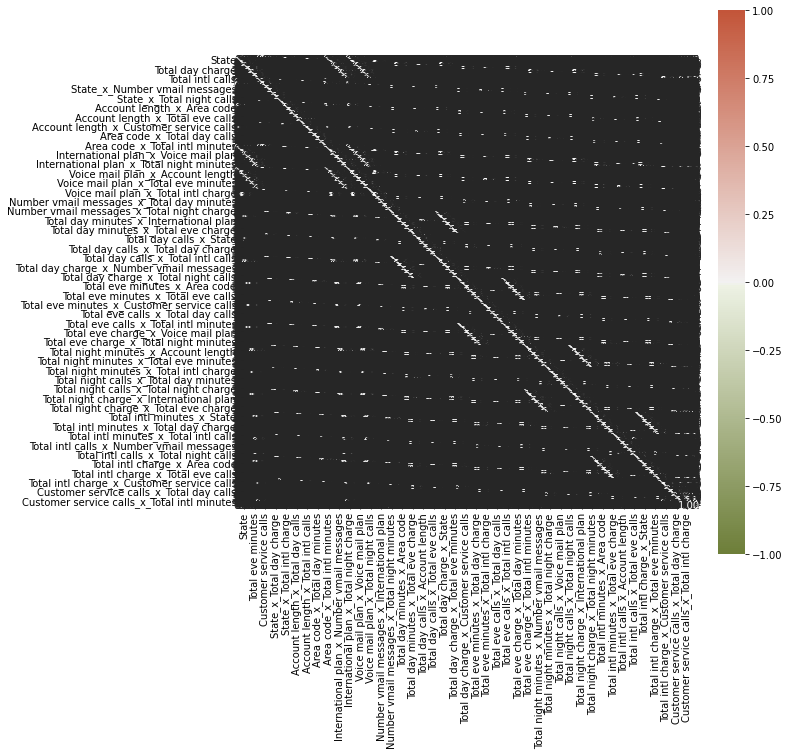

In [38]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,linewidths=.5, fmt= '.2f',mask=np.zeros_like(corr, dtype=np.bool), \
            cmap=sns.diverging_palette(100,20, as_cmap=True), square=True)

Есть признаки, которые почти не коррелируют с целевой переменной (|коррел| < 0.05):

In [76]:
no_corr = (corr['Churn'][abs(corr['Churn']) < 0.1]).index.to_list()
no_corr

['State',
 'Account length',
 'Area code',
 'Voice mail plan',
 'Number vmail messages',
 'Total day calls',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'State_x_State',
 'State_x_Account length',
 'State_x_Area code',
 'State_x_International plan',
 'State_x_Voice mail plan',
 'State_x_Number vmail messages',
 'State_x_Total day minutes',
 'State_x_Total day calls',
 'State_x_Total day charge',
 'State_x_Total eve minutes',
 'State_x_Total eve calls',
 'State_x_Total eve charge',
 'State_x_Total night minutes',
 'State_x_Total night calls',
 'State_x_Total night charge',
 'State_x_Total intl minutes',
 'State_x_Total intl calls',
 'State_x_Total intl charge',
 'State_x_Customer service calls',
 'Account length_x_State',
 'Account length_x_Account length',
 'Account length_x_Area code',
 'Account length_x_International plan',
 'Accou

In [77]:
X_train.drop(no_corr, axis=1, inplace=True)
X_test.drop(no_corr, axis=1, inplace=True)

In [78]:
X_train

,International plan,Total day minutes,Total day charge,Customer service calls,International plan_x_International plan,International plan_x_Total day minutes,International plan_x_Total day charge,International plan_x_Customer service calls,Voice mail plan_x_Total day minutes,Voice mail plan_x_Total day charge,...,Total eve minutes_x_Total day minutes,Total eve minutes_x_Total day charge,Total eve charge_x_Voice mail plan,Total eve charge_x_Total day minutes,Total eve charge_x_Total day charge,Customer service calls_x_International plan,Customer service calls_x_Voice mail plan,Customer service calls_x_Total day minutes,Customer service calls_x_Total day charge,Customer service calls_x_Customer service calls
2016,1,0.410716,0.410877,1.073319,1,0.410716,0.410877,1.073319,0.410716,0.410877,...,0.479347,0.479535,1.167733,0.479606,0.479794,1.073319,1.073319,0.440829,0.441002,1.152013
1362,1,-0.864713,-0.865095,1.073319,1,-0.864713,-0.865095,1.073319,-0.864713,-0.865095,...,2.281997,2.283004,-2.637901,2.281028,2.282035,1.073319,1.073319,-0.928113,-0.928523,1.152013
2670,1,0.752053,0.752000,0.323378,1,0.752053,0.752000,0.323378,0.000000,0.000000,...,-0.740159,-0.740106,-0.000000,-0.739325,-0.739272,0.323378,0.000000,0.243197,0.243180,0.104573
2210,1,1.814605,1.814230,-1.176504,1,1.814605,1.814230,-1.176504,1.814605,1.814230,...,-0.384565,-0.384486,-0.211288,-0.383403,-0.383324,-1.176504,-1.176504,-2.134890,-2.134449,1.384162
1846,1,-0.038896,-0.039276,-0.426563,1,-0.038896,-0.039276,-0.426563,-0.000000,-0.000000,...,0.019814,0.020007,-0.000000,0.019847,0.020041,-0.426563,-0.000000,0.016592,0.016754,0.181956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1,1.732023,1.732188,-0.426563,1,1.732023,1.732188,-0.426563,1.732023,1.732188,...,-0.080442,-0.080450,-0.046732,-0.080941,-0.080949,-0.426563,-0.426563,-0.738817,-0.738887,0.181956
1130,1,-2.659490,-2.659228,-0.426563,1,-2.659490,-2.659228,-0.426563,-2.659490,-2.659228,...,1.056115,1.056011,-0.396702,1.055025,1.054921,-0.426563,-0.426563,1.134440,1.134329,0.181956
1294,1,-1.696036,-1.696312,-0.426563,1,-1.696036,-1.696312,-0.426563,-1.696036,-1.696312,...,-2.039590,-2.039922,1.202498,-2.039481,-2.039813,-0.426563,-0.426563,0.723466,0.723584,0.181956
860,1,-0.015039,-0.015527,0.323378,1,-0.015039,-0.015527,0.323378,-0.015039,-0.015527,...,0.007631,0.007879,-0.507951,0.007639,0.007887,0.323378,0.323378,-0.004863,-0.005021,0.104573


Построим заново матрицу коррел и посмотрим теперь на корреляцию различных признаков между собой

In [79]:
data = pd.concat([X_train, y_train], axis=1)
corr = data.corr()

In [80]:
#матрица коррел без целевой переменной, чтоб искать большую коррел между признаками только
corr_no_target = corr.drop('Churn', axis = 1)
corr_no_target = corr_no_target.drop('Churn', axis = 0)
corr_no_target

,International plan,Total day minutes,Total day charge,Customer service calls,International plan_x_International plan,International plan_x_Total day minutes,International plan_x_Total day charge,International plan_x_Customer service calls,Voice mail plan_x_Total day minutes,Voice mail plan_x_Total day charge,...,Total eve minutes_x_Total day minutes,Total eve minutes_x_Total day charge,Total eve charge_x_Voice mail plan,Total eve charge_x_Total day minutes,Total eve charge_x_Total day charge,Customer service calls_x_International plan,Customer service calls_x_Voice mail plan,Customer service calls_x_Total day minutes,Customer service calls_x_Total day charge,Customer service calls_x_Customer service calls
International plan,1.000000,-0.056600,-0.056598,0.028781,1.000000,-0.005729,-0.005729,0.002884,-0.037516,-0.037511,...,0.021150,0.021144,-0.006989,0.021135,0.021129,0.002884,0.026222,0.041936,0.041940,-0.005465
Total day minutes,-0.056600,1.000000,1.000000,-0.041492,-0.056600,0.940371,0.940371,-0.026633,0.858820,0.858820,...,0.007227,0.007219,-0.005939,0.007191,0.007184,-0.026633,-0.034821,-0.001645,-0.001644,-0.016834
Total day charge,-0.056598,1.000000,1.000000,-0.041499,-0.056598,0.940368,0.940368,-0.026639,0.858819,0.858819,...,0.007219,0.007212,-0.005928,0.007184,0.007176,-0.026639,-0.034830,-0.001644,-0.001642,-0.016834
Customer service calls,0.028781,-0.041492,-0.041499,1.000000,0.028781,-0.026900,-0.026906,0.949579,-0.034752,-0.034761,...,0.010792,0.010788,-0.017746,0.010784,0.010779,0.949579,0.857161,-0.033888,-0.033887,0.574517
International plan_x_International plan,1.000000,-0.056600,-0.056598,0.028781,1.000000,-0.005729,-0.005729,0.002884,-0.037516,-0.037511,...,0.021150,0.021144,-0.006989,0.021135,0.021129,0.002884,0.026222,0.041936,0.041940,-0.005465
International plan_x_Total day minutes,-0.005729,0.940371,0.940368,-0.026900,-0.005729,1.000000,1.000000,-0.028173,0.801196,0.801194,...,-0.013835,-0.013842,0.004945,-0.013865,-0.013872,-0.028173,-0.018755,0.018669,0.018669,-0.017692
International plan_x_Total day charge,-0.005729,0.940371,0.940368,-0.026906,-0.005729,1.000000,1.000000,-0.028180,0.801195,0.801193,...,-0.013842,-0.013849,0.004954,-0.013873,-0.013879,-0.028180,-0.018763,0.018669,0.018669,-0.017691
International plan_x_Customer service calls,0.002884,-0.026633,-0.026639,0.949579,0.002884,-0.028173,-0.028180,1.000000,-0.018660,-0.018667,...,0.001095,0.001095,-0.017689,0.001090,0.001090,1.000000,0.831344,-0.052454,-0.052450,0.540772
Voice mail plan_x_Total day minutes,-0.037516,0.858820,0.858819,-0.034752,-0.037516,0.801196,0.801195,-0.018660,1.000000,1.000000,...,-0.006224,-0.006236,-0.006912,-0.006254,-0.006266,-0.018660,-0.040549,-0.005015,-0.005013,-0.020847
Voice mail plan_x_Total day charge,-0.037511,0.858820,0.858819,-0.034761,-0.037511,0.801194,0.801193,-0.018667,1.000000,1.000000,...,-0.006237,-0.006249,-0.006900,-0.006266,-0.006279,-0.018667,-0.040560,-0.005013,-0.005012,-0.020850


In [81]:
# создаем дф из попарных корреляций по убыванию
# да, выглядит по-умному как будто, но это из курсача моего, я сама писала!!

df_corr = corr_no_target.abs().unstack().sort_values(kind="quicksort", ascending=False)
df_corr = df_corr[df_corr < 1].drop_duplicates()
df_corr

Total day charge_x_Total day minutes   Total day charge_x_Total day charge     1.000000
Total day minutes_x_Total day minutes  Total day charge_x_Total day minutes    1.000000
Voice mail plan_x_Total day minutes    Total day charge_x_Voice mail plan      1.000000
Voice mail plan_x_Total day charge     Total day minutes_x_Voice mail plan     1.000000
Total eve charge_x_Total day minutes   Total day charge_x_Total eve charge     1.000000
                                                                                 ...   
Total day minutes_x_Total day minutes  Voice mail plan_x_Total eve charge      0.000199
Total eve minutes_x_Voice mail plan    Total day charge_x_Total day minutes    0.000194
Voice mail plan_x_Total eve minutes    Total day charge_x_Total day minutes    0.000194
Total day minutes_x_Total day minutes  Total eve minutes_x_Voice mail plan     0.000185
                                       Voice mail plan_x_Total eve minutes     0.000185
Length: 364, dtype: float64

In [82]:
big_corr_drop = []
for pair in df_corr[df_corr > 0.9].index.to_list():
    big_corr_drop.append(pair[1])


In [83]:
X_train.drop(big_corr_drop, axis=1, inplace=True)
X_test.drop(big_corr_drop, axis=1, inplace=True)

In [84]:
X_train

,International plan,International plan_x_International plan,International plan_x_Total day minutes,International plan_x_Total day charge,International plan_x_Customer service calls,Voice mail plan_x_Total day minutes,Voice mail plan_x_Total day charge,Voice mail plan_x_Total eve minutes,Voice mail plan_x_Total eve charge,Voice mail plan_x_Customer service calls,...,Total day charge_x_Customer service calls,Total eve minutes_x_Voice mail plan,Total eve minutes_x_Total day minutes,Total eve minutes_x_Total day charge,Total eve charge_x_Total day minutes,Customer service calls_x_International plan,Customer service calls_x_Voice mail plan,Customer service calls_x_Total day minutes,Customer service calls_x_Total day charge,Customer service calls_x_Customer service calls
2016,1,1,0.410716,0.410877,1.073319,0.410716,0.410877,1.167102,1.167733,1.073319,...,0.441002,1.167102,0.479347,0.479535,0.479606,1.073319,1.073319,0.440829,0.441002,1.152013
1362,1,1,-0.864713,-0.865095,1.073319,-0.864713,-0.865095,-2.639021,-2.637901,1.073319,...,-0.928523,-2.639021,2.281997,2.283004,2.281028,1.073319,1.073319,-0.928113,-0.928523,1.152013
2670,1,1,0.752053,0.752000,0.323378,0.000000,0.000000,-0.000000,-0.000000,0.000000,...,0.243180,-0.000000,-0.740159,-0.740106,-0.739325,0.323378,0.000000,0.243197,0.243180,0.104573
2210,1,1,1.814605,1.814230,-1.176504,1.814605,1.814230,-0.211928,-0.211288,-1.176504,...,-2.134449,-0.211928,-0.384565,-0.384486,-0.383403,-1.176504,-1.176504,-2.134890,-2.134449,1.384162
1846,1,1,-0.038896,-0.039276,-0.426563,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,0.016754,-0.000000,0.019814,0.020007,0.019847,-0.426563,-0.000000,0.016592,0.016754,0.181956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1,1,1.732023,1.732188,-0.426563,1.732023,1.732188,-0.046444,-0.046732,-0.426563,...,-0.738887,-0.046444,-0.080442,-0.080450,-0.080941,-0.426563,-0.426563,-0.738817,-0.738887,0.181956
1130,1,1,-2.659490,-2.659228,-0.426563,-2.659490,-2.659228,-0.397112,-0.396702,-0.426563,...,1.134329,-0.397112,1.056115,1.056011,1.055025,-0.426563,-0.426563,1.134440,1.134329,0.181956
1294,1,1,-1.696036,-1.696312,-0.426563,-1.696036,-1.696312,1.202563,1.202498,-0.426563,...,0.723584,1.202563,-2.039590,-2.039922,-2.039481,-0.426563,-0.426563,0.723466,0.723584,0.181956
860,1,1,-0.015039,-0.015527,0.323378,-0.015039,-0.015527,-0.507434,-0.507951,0.323378,...,-0.005021,-0.507434,0.007631,0.007879,0.007639,0.323378,0.323378,-0.004863,-0.005021,0.104573


Из 380 (после добавления полиномиальных) осталось 25 признаков (изначально было 19)

#### Логистическая регрессия:

In [85]:
for score in scores:
    cv_train_lr = cross_validate(log_reg, X_train, y_train, scoring=score, cv=5)
    print(f"Среднее {score} на train = {cv_train_lr['test_score'].mean()}")


Среднее accuracy на train = 0.8885489518522943
Среднее balanced_accuracy на train = 0.6883890927436831
Среднее precision на train = 0.7011904761904761
Среднее recall на train = 0.40588235294117647
Среднее f1 на train = 0.5131309161891686
Среднее roc_auc на train = 0.8756649790304907


In [86]:
for score in scores:
    cv_test_lr = cross_validate(log_reg, X_test, y_test, scoring=score, cv=5)
    print(f"Среднее {score} на test = {cv_test_lr['test_score'].mean()}")


Среднее accuracy на test = 0.906
Среднее balanced_accuracy на test = 0.7474010976385095
Среднее precision на test = 0.7529761904761905
Среднее recall на test = 0.5251231527093596
Среднее f1 на test = 0.6130310121145701
Среднее roc_auc на test = 0.9004617849756709


По сравнению с обучением на признаках после добавления полиномов:
- roc_auc немного вырос на train и test
- f1 упал на 0.1 на train

#### SVM:

In [87]:
for score in scores:
    cv_train_lr = cross_validate(svm, X_train, y_train, scoring=score, cv=5)
    print(f"Среднее {score} на train = {cv_train_lr['test_score'].mean()}")


Среднее accuracy на train = 0.8816911893099043
Среднее balanced_accuracy на train = 0.6221710980081003
Среднее precision на train = 0.7890372670807453
Среднее recall на train = 0.25588235294117645
Среднее f1 на train = 0.3838126293182473
Среднее roc_auc на train = 0.8571419125703705


In [88]:
for score in scores:
    cv_test_lr = cross_validate(svm, X_test, y_test, scoring=score, cv=5)
    print(f"Среднее {score} на test = {cv_test_lr['test_score'].mean()}")


Среднее accuracy на test = 0.8960000000000001
Среднее balanced_accuracy на test = 0.6512734154284401
Среднее precision на test = 0.9158974358974359
Среднее recall на test = 0.3083743842364532
Среднее f1 на test = 0.4546728059436661
Среднее roc_auc на test = 0.8768851676772794


По сравнению с обучением на признаках после добавления полиномов:
- roc_auc немного вырос на train и test
- f1 упал

f1-упало для обеих моделей после удаления признаков, возможно, стоило взять другую границу по корреляции при удалении признаков, чтобы удалялось меньше признаков

## E. Мини-отчет

#### a) какой классификатор дал наилучший результат? чему равны значения метрик accuracy, f1-score и ROC-AUC?



Классификаторы дали примерно одинаковые результаты по метрикам качества
 - Для лог регрессии accuracy на train = 0.8885489518522943, accuracy на test = 0.906
 - Для svm accuracy на train = 0.8816911893099043, accuracy на test = 0.8960000000000001

То есть значения на train примерно одинаковы, для лог регрессии чуть больше, на тесте для лог регрессии значение немного лучше

 - для лог регрессии f1 на train = 0.5131309161891686, f1 на test = 0.6130310121145701
 - для svm f1 на train = 0.3838126293182473, f1 на test = 0.4546728059436661

Для лог регрессии значения получились больше, эта модель лучше по f1-метрике


- для лог регрессии roc_auc на train = 0.8756649790304907, roc_auc на test = 0.9004617849756709
- для svm roc_auc на train = 0.8571419125703705, roc_auc на test = 0.8768851676772794

На train значение лучше для svm, на тесте - наоборот

Таким образом, так как по f1 и accuracy первая модель лучше, то можно сказать, что лог регрессия в целом дала результат лучше.

#### b) какие новые признаки вы добавили и какие признаки удалили?

Были добавлены попарные произведения всех признаков между собой (полиномы 2 степени), затем были удалены признаки, которые наименее коррелируют с целевой переменной (корреляция по модулю меньше 0.1), и признаки, которые сильно коррелируют между собой (корреляция по модулю больше 0.9).

#### c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?



Да, алгоритм не переобучился (нет такого, что на train метрики сильно лучше, чем на test), недообучения также нет, так как roc_auc все же ближе к 1, чем к 0.5, f1 для лог регрессии далеко от 0.

## Часть 2. Оценка качества моделей классификации (5 баллов).

* Колонки 0, 1, ..., 13 - анонимизированные характеристики клиентов (некоторые числовые, некоторые категориальные). 
* Target - целевая переменная: 1 - выдать кредит, 0 - не выдать кредит.

На этих данных было обучено три различных алгоритма классификации и получены предсказания:
* pred1_probs - предсказанные вероятности положительного класса, полученные алгоритмом 1.
* pred1_classes - предсказанные алгоритмом 1 классы
* pred2_probs, pred2_classes, pred3_probs, pred3_classes - аналогичные величины для алгоритмов 2 и 3

Наша задача - оценить качество каждого из трех алгоритмов и разобраться, какой из алгоритмов лучше всего работает в данной задаче.

In [136]:
df = pd.read_csv("credit_scoring_example1.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes
0,1,22.08,11.46,2,4,4,1.585,0,0,0,...,2,100,1213,0,0.506772,1,0.610853,1,0.375494,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,...,2,160,1,0,0.358519,0,0.185941,0,0.200975,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,...,2,280,1,0,0.358753,0,0.523009,1,0.160465,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,...,2,0,1,1,0.408729,0,0.185941,0,0.357771,0
4,1,20.17,8.17,2,6,4,1.960,1,1,14,...,2,60,159,1,0.480904,0,0.526646,1,0.260169,0


In [137]:
df.shape

(689, 21)

**Задание 1.** Проверьте target на сбалансированность по классам, сделайте вывод.

In [138]:
X = df.iloc[:,:df.columns.get_loc('target')]
y = df['target']

In [139]:
y.value_counts(normalize=True)

0    0.554427
1    0.445573
Name: target, dtype: float64

Вывод: Классы сбалансированны (доля для 0 и 1 несильно отличается)

**Задание 2.** Вычислите accuracy - долю правильных ответов каждого из алгоритмов. Какой алгоритм имеет наибольшую accuracy?

In [140]:
from sklearn.metrics import accuracy_score

print('Доля правильных ответов для 1 алгоритма =', accuracy_score(y, df['pred1_classes']))
print('Доля правильных ответов для 2 алгоритма =', accuracy_score(y, df['pred2_classes']))
print('Доля правильных ответов для 3 алгоритма =', accuracy_score(y, df['pred3_classes']))

Доля правильных ответов для 1 алгоритма = 0.6618287373004355
Доля правильных ответов для 2 алгоритма = 0.6719883889695211
Доля правильных ответов для 3 алгоритма = 0.6400580551523948


2 алгоритм имеет наибольшее accuracy

**Задание 3.** Теперь вычислите точность и полноту каждого из алгоритмов.

In [141]:
from sklearn.metrics import recall_score, precision_score

print('Для 1 алгоритма точность = ', recall_score(y, df['pred1_classes']),
     ', полнота = ', precision_score(y, df['pred1_classes']), sep='')
print('Для 2 алгоритма точность = ', recall_score(y, df['pred2_classes'], ),
     ', полнота = ', precision_score(y, df['pred2_classes']), sep='')
print('Для 3 алгоритма точность = ', recall_score(y, df['pred3_classes']),
     ', полнота = ', precision_score(y, df['pred3_classes']), sep='')

Для 1 алгоритма точность = 0.4364820846905538, полнота = 0.6907216494845361
Для 2 алгоритма точность = 0.7296416938110749, полнота = 0.6103542234332425
Для 3 алгоритма точность = 0.3485342019543974, полнота = 0.6903225806451613


Самым полезным инструментом в практических задачах является ***матрица ошибок***. Смотря на неё и регулируя порог, определяющий классы, мы можем достичь оптимального решения нашей задачи.

**Задание 4.** Используя функцию plot_confusion_matrix для визуализации матрицы ошибок, нарисуйте матрицы ошибок всех трех алгоритмов.

In [142]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [143]:
from sklearn.metrics import confusion_matrix

cnf_matrix_1 = confusion_matrix(df['target'], df['pred1_classes'])
cnf_matrix_2 = confusion_matrix(df['target'], df['pred2_classes'])
cnf_matrix_3 = confusion_matrix(df['target'], df['pred3_classes'])

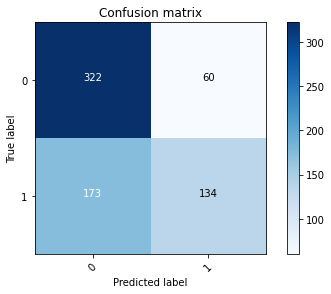

In [144]:
plot_confusion_matrix(cnf_matrix_1, classes = [0, 1])

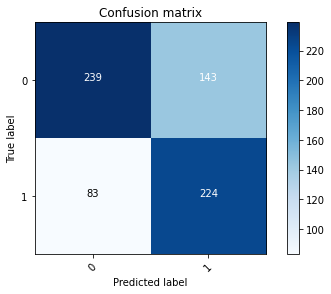

In [145]:
plot_confusion_matrix(cnf_matrix_2, classes = [0, 1])

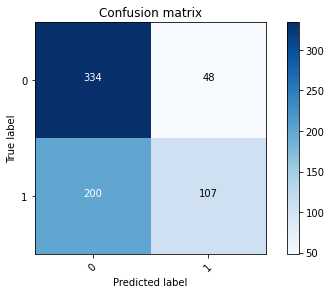

In [146]:
plot_confusion_matrix(cnf_matrix_3, classes = [0, 1])

Давайте определимся с целями нашего предсказания:
    
* **Вариант 1**: хотим выдать кредит максимальному числу людей среди тех, кто мог бы его вернуть. При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того полнота должна быть как можно больше (число в левом нижнем квадрате матрицы ошибок минимально).

**Задание 5.** Для каждого алгоритма найдите такой порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной полноты можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

**Комментарий:** порог можно искать в цикле с небольшим шагом.

In [299]:
def t_search_recall(pred_prob):
    
    acc_more65 = []

    for t in np.arange(0, 1, 0.01):
    
        pred_cl = []
        for prob in pred_prob:
            pred_cl.append(0 if prob < t else 1)
        accuracy = accuracy_score(y, pred_cl)
        recall = recall_score(y, pred_cl)
    
        if accuracy >= 0.65:
            acc_more65.append([recall, accuracy, t])

    acc_more65 = sorted(acc_more65, reverse=True)

    if len(acc_more65) != 0:
        print('Наибольшая полнота = ', acc_more65[0][0],' достигается при t = ', acc_more65[0][2],
          ' (accuracy = ', acc_more65[0][1], ')', sep='')
    else:
        print('нет такого t')

In [300]:
t_search_recall(df['pred1_probs'])

Наибольшая полнота = 0.742671009771987 достигается при t = 0.36 (accuracy = 0.6516690856313497)


In [303]:
t_search_recall(df['pred2_probs'])

Наибольшая полнота = 0.8371335504885994 достигается при t = 0.31 (accuracy = 0.6748911465892597)


In [302]:
t_search_recall(df['pred3_probs'])

нет такого t


**Задание 6.** Визуализируйте матрицу ошибок для каждого из трех алгоритмов с подобранным порогом.

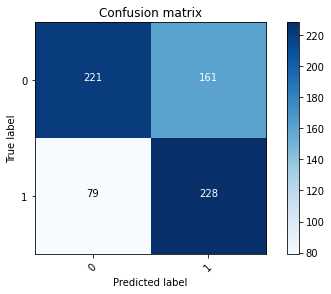

In [275]:
t = 0.36
pr_classes_1 = [0 if prob < t else 1 for prob in df['pred1_probs']]
cnf_matr_1 = confusion_matrix(df['target'], pr_classes_1)

plot_confusion_matrix(cnf_matr_1, classes = [0, 1])

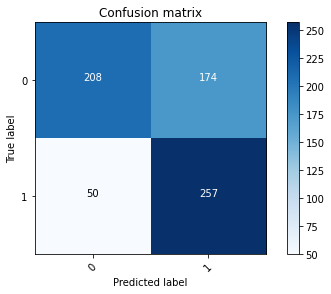

In [305]:
t = 0.31
pr_classes_2 = [0 if prob < t else 1 for prob in df['pred2_probs']]
cnf_matr_2 = confusion_matrix(df['target'], pr_classes_2)

plot_confusion_matrix(cnf_matr_2, classes = [0, 1])

для 3 алгоритма нет такого порога при котором accuracy >= 0.65

**Выводы:** здесь напишите, какая модель лучше всего справилась с поставленной задачей.

Вторая модель лучше справилась, там полнота наибольшая

Наша цель может звучать и по-другому:
    
* **Вариант 2**: среди тех, кому модель выдает кредит, должно быть меньше всего ошибок (мало людей, кто его на самом деле не вернет - на них будем терять деньги). 
    При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того точность должна быть как можно больше (число в правом верхнем квадрате матрицы ошибок минимально).

**Задание 7.** Для каждого алгоритма найдите порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной точности можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65? 

In [298]:
def t_search_prec(pred_prob):

    acc_more65 = []

    for t in np.arange(0, 1, 0.01):
    
        pred_cl = []
        for prob in pred_prob:
            pred_cl.append(0 if prob < t else 1)
        accuracy = accuracy_score(y, pred_cl)
        precision = precision_score(y, pred_cl)
    
        if accuracy >= 0.65:
            acc_more65.append([precision, accuracy, t])

    acc_more65 = sorted(acc_more65, reverse=True)

    if len(acc_more65) != 0:
        print('Наибольшая точность = ', acc_more65[0][0],' достигается при t = ', acc_more65[0][2],
          ' (accuracy = ', acc_more65[0][1], ')', sep='')
    else:
        print('нет такого t')

In [295]:
t_search_prec(df['pred1_probs'])

Наибольшая точность = 0.7371794871794872 достигается при t = 0.54 (accuracy = 0.6618287373004355)


In [296]:
t_search_prec(df['pred2_probs'])

Наибольшая точность = 0.8367346938775511 достигается при t = 0.75 (accuracy = 0.6502177068214804)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Fram

In [297]:
t_search_prec(df['pred3_probs'])

нет такого t


**Задание 8.** Нарисуйте матрицы ошибок для каждого из алгоритмов с найденными значениями порога. Какая модель лучше всех справилась с этой задачей?

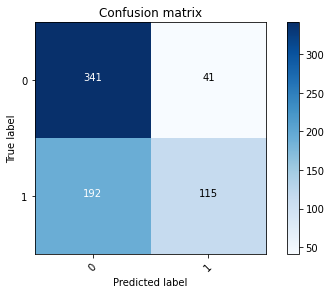

In [280]:
t = 0.54
pr_classes_1 = [0 if prob < t else 1 for prob in df['pred1_probs']]
cnf_matr_1 = confusion_matrix(df['target'], pr_classes_1)

plot_confusion_matrix(cnf_matr_1, classes = [0, 1])

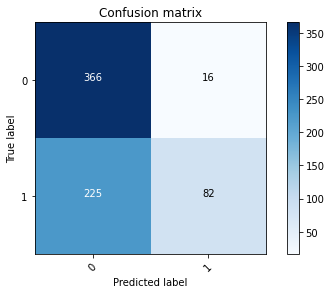

In [281]:
t = 0.75
pr_classes_2 = [0 if prob < t else 1 for prob in df['pred2_probs']]
cnf_matr_2 = confusion_matrix(df['target'], pr_classes_2)

plot_confusion_matrix(cnf_matr_2, classes = [0, 1])

для 3 алгоритма нет такого порога при котором accuracy >= 0.65

Также (**Вариант 3**) можно потребовать, чтобы и точность, и полнота были высокими, то есть обе ошибки в матрице ошибок были маленькие. Как вариант - можно максимизировать F1-score (среднее гармоническое между точностью и полнотой).

**Задание 9.** Найдите пороги для достижения максимального F1-score для каждой из трех моделей и нарисуйте матрицы ошибок. Какая модель решает поставленную задачу лучше остальных?

In [308]:
from sklearn.metrics import f1_score

In [309]:
def t_search_f1(pred_prob):
    
    f1_scores = []

    for t in np.arange(0, 1, 0.01):
    
        pred_cl = []
        for prob in pred_prob:
            pred_cl.append(0 if prob < t else 1)

        f1_scores.append([f1_score(y, pred_cl), t])
    
    f1_scores = sorted(f1_scores, reverse=True)

    if len(f1_scores) != 0:
        print('Наибольшее f1 = ', f1_scores[0][0],' достигается при t = ', f1_scores[0][1], sep='')
    else:
        print('нет такого t')

In [310]:
t_search_f1(df['pred1_probs'])

Наибольшее f1 = 0.672 достигается при t = 0.34


In [311]:
t_search_f1(df['pred2_probs'])

Наибольшее f1 = 0.6990291262135923 достигается при t = 0.32


In [312]:
t_search_f1(df['pred3_probs'])

Наибольшее f1 = 0.6443418013856813 достигается при t = 0.15


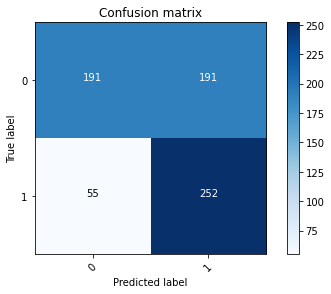

In [289]:
t = 0.34
pr_classes = [0 if prob < t else 1 for prob in df['pred1_probs']]
cnf_matr = confusion_matrix(df['target'], pr_classes)

plot_confusion_matrix(cnf_matr, classes = [0, 1])

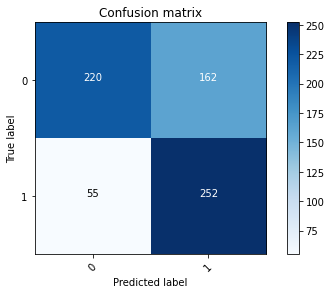

In [290]:
t = 0.32
pr_classes = [0 if prob < t else 1 for prob in df['pred2_probs']]
cnf_matr = confusion_matrix(df['target'], pr_classes)

plot_confusion_matrix(cnf_matr, classes = [0, 1])

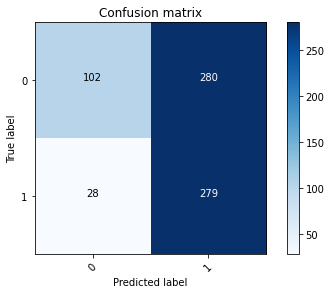

In [291]:
t = 0.15
pr_classes = [0 if prob < t else 1 for prob in df['pred3_probs']]
cnf_matr = confusion_matrix(df['target'], pr_classes)

plot_confusion_matrix(cnf_matr, classes = [0, 1])

#### Кстати

В python есть удобная функция classification_report, которая выводит значения нескольких метрик.

In [183]:
from sklearn.metrics import classification_report

print(classification_report(df['target'],df['pred1_classes']))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       382
           1       0.69      0.44      0.53       307

    accuracy                           0.66       689
   macro avg       0.67      0.64      0.63       689
weighted avg       0.67      0.66      0.65       689



### Обучим свою модель для предсказания target.

**Задание 10.** Отнормируйте признаки в задаче и обучите логистическую регрессию предсказывать target.

In [186]:
from sklearn.preprocessing import normalize

X = normalize(X)

array([[8.21431126e-04, 1.81371993e-02, 9.41360070e-03, ...,
        1.64286225e-03, 8.21431126e-02, 9.96395956e-01],
       [0.00000000e+00, 1.39917065e-01, 4.32033283e-02, ...,
        1.23438081e-02, 9.87504646e-01, 6.17190404e-03],
       [0.00000000e+00, 1.05029342e-01, 6.21370348e-03, ...,
        7.10137541e-03, 9.94192557e-01, 3.55068770e-03],
       ...,
       [0.00000000e+00, 1.83695623e-01, 9.30672460e-02, ...,
        1.95109530e-02, 9.75547651e-01, 9.75547651e-03],
       [0.00000000e+00, 2.18234206e-01, 1.15404668e-01, ...,
        1.59178852e-02, 9.55073112e-01, 9.55073112e-02],
       [1.78059448e-03, 7.30043736e-02, 7.12237792e-05, ...,
        1.78059448e-03, 9.97132908e-01, 1.78059448e-03]])

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LogisticRegression(random_state=0).fit(X_train, y_train)
prob_pred = lr.predict_proba(X_test)
y_pred = lr.predict(X_test)

In [197]:
pd.DataFrame(prob_pred)

,0,1
0,0.381227,0.618773
1,0.695035,0.304965
2,0.700623,0.299377
3,0.618155,0.381845
4,0.306536,0.693464
...,...,...
202,0.529304,0.470696
203,0.590147,0.409853
204,0.696240,0.303760
205,0.702400,0.297600


**Задание 11.** Подберите порог для перевода предсказания в классы, чтобы максимизировать:
    а) точность 
    б) полноту 
    в) f1-score. 
Лучше ли логистическая регрессия справилась с задачей, чем три готовые модели, предсказания которых мы анализировали выше?